In [7]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt # It provides an implicit, MATLAB-like, way of plotting.

from sklearn.model_selection import train_test_split #split data

# to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# build the model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay # Confusion matrix with clear numbers inside boxes

import sklearn
import sys

In [8]:
PROJECT_PATH = '~/Documents/data-engineering/learning/mlops/'

## 2. Exploratory Data Analysis (EDA)

**Exploratory Data Analysis (EDA)** is the process of examining and visualizing a dataset to gain insights, understand its structure, and uncover patterns before any modeling. It helps in preparing the data for machine learning by identifying key trends, relationships, and potential issues like missing values or outliers.

*Key Points*:
- **Summarize Data**: Understand basic statistics (mean, median, range) and data types.
- **Visualize**: Use charts like histograms, scatter plots, and heatmaps to explore distributions and relationships.
- **Detect Issues**: Spot missing data, outliers, and anomalies that might affect modeling.
- **Guide Feature Engineering**: Helps decide which features are important and need further transformation.
EDA ensures that your data is well-understood and clean before applying any models.

In [10]:
df = pd.read_csv(PROJECT_PATH + 'data/mobile_phone_classification/train.csv')
df.head(10)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   
5           1859     0          0.5         1   3       0          22    0.7   
6           1821     0          1.7         0   4       1          10    0.8   
7           1954     0          0.5         1   0       0          24    0.8   
8           1445     1          0.5         0   0       0          53    0.7   
9            509     1          0.6         1   2       1           9    0.1   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   
5        164        1  ...       1004      1654  1067    17     1         10   
6        139        8  ...        381      1018  3220    13     8         18   
7        187        4  ...        512      1149   700    16     3          5   
8        174        7  ...        386       836  1099    17     1         20   
9         93        5  ...       1137      1224   513    19    10         12   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  
5        1             0     0            1  
6        1             0     1            3  
7        1             1     1            0  
8        1             0     0            0  
9        1             0     0            0  

[10 rows x 21 columns]

In [11]:
# Show shape 
df.shape

(2000, 21)

In [12]:
# Check duplication
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

In [13]:
# display some information about out data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

Here ... Take a look to columns meaning, I can note that we have px_width, px_height which reference to high and width of mobile with pixels, and we have sc_h, sc_w which reference to high and width of mobile with inch ..

We need to make sure that are the values directly related ??.

I mean that if px_width, px_height are resolutions in pixels and sc_w, sc_h are screen dimensions in inches, then they should have a mathematical relationship through the PPI (pixels per inch) ratio.

We could check if a constant factor links these pairs of columns, If the ratios are consistent, it means the values are just different representations of the same information.

In [14]:
df['px_ratio_width'] = df['px_width'] / df['sc_w']
df['px_ratio_height'] = df['px_height'] / df['sc_h']
print(df[['px_ratio_width', 'px_ratio_height']].sample(10))

      px_ratio_width  px_ratio_height
231       130.800000        37.818182
38        730.000000        57.833333
771       386.000000        27.000000
940       555.333333       135.833333
1006      142.500000        34.375000
606       140.166667         6.769231
1577             inf        86.857143
1488     1331.000000        69.105263
1161       91.285714        41.625000
228        76.625000        21.631579


Presence of inf and NaN values in px_ratio_width indicates that there are issues, likely due to division by zero or very small numbers in the sc_w column. These values would not appear if the ratios were consistent.

These results imply that px_width, px_height, sc_w, and sc_h are not simply scaled versions of each other. They likely represent different aspects of the phone's characteristics (e.g., pixel density might vary significantly across different phones).

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   battery_power    2000 non-null   int64  
 1   blue             2000 non-null   int64  
 2   clock_speed      2000 non-null   float64
 3   dual_sim         2000 non-null   int64  
 4   fc               2000 non-null   int64  
 5   four_g           2000 non-null   int64  
 6   int_memory       2000 non-null   int64  
 7   m_dep            2000 non-null   float64
 8   mobile_wt        2000 non-null   int64  
 9   n_cores          2000 non-null   int64  
 10  pc               2000 non-null   int64  
 11  px_height        2000 non-null   int64  
 12  px_width         2000 non-null   int64  
 13  ram              2000 non-null   int64  
 14  sc_h             2000 non-null   int64  
 15  sc_w             2000 non-null   int64  
 16  talk_time        2000 non-null   int64  
 17  three_g       

In [16]:
# Remove (px_ratio_height, px_ratio_width) columns from data
df.drop(['px_ratio_height', 'px_ratio_width'], axis=1, inplace=True)

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print(df.describe())

       battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0

This previous function provides a set of summary statistics that help you better understand the distribution of data, including:

- Count: the number of non-empty values in each column.
- Arithmetic mean( mean): the average of the values of the numerical column.
- Standard deviation (std): a measure of the spread of data about the arithmetic mean.
- Minimum (min): the smallest value in the column.
- First quarter (25%): the value that separates the smallest 25% of the data.
- Median (50%): the value that separates the lower half of the data from the upper half (the same arithmetic mean in the case of a symmetric distribution).
- Third quarter (75%): the value that separates the largest 25% of the data.
- Upper limit (max): the largest value in the column.

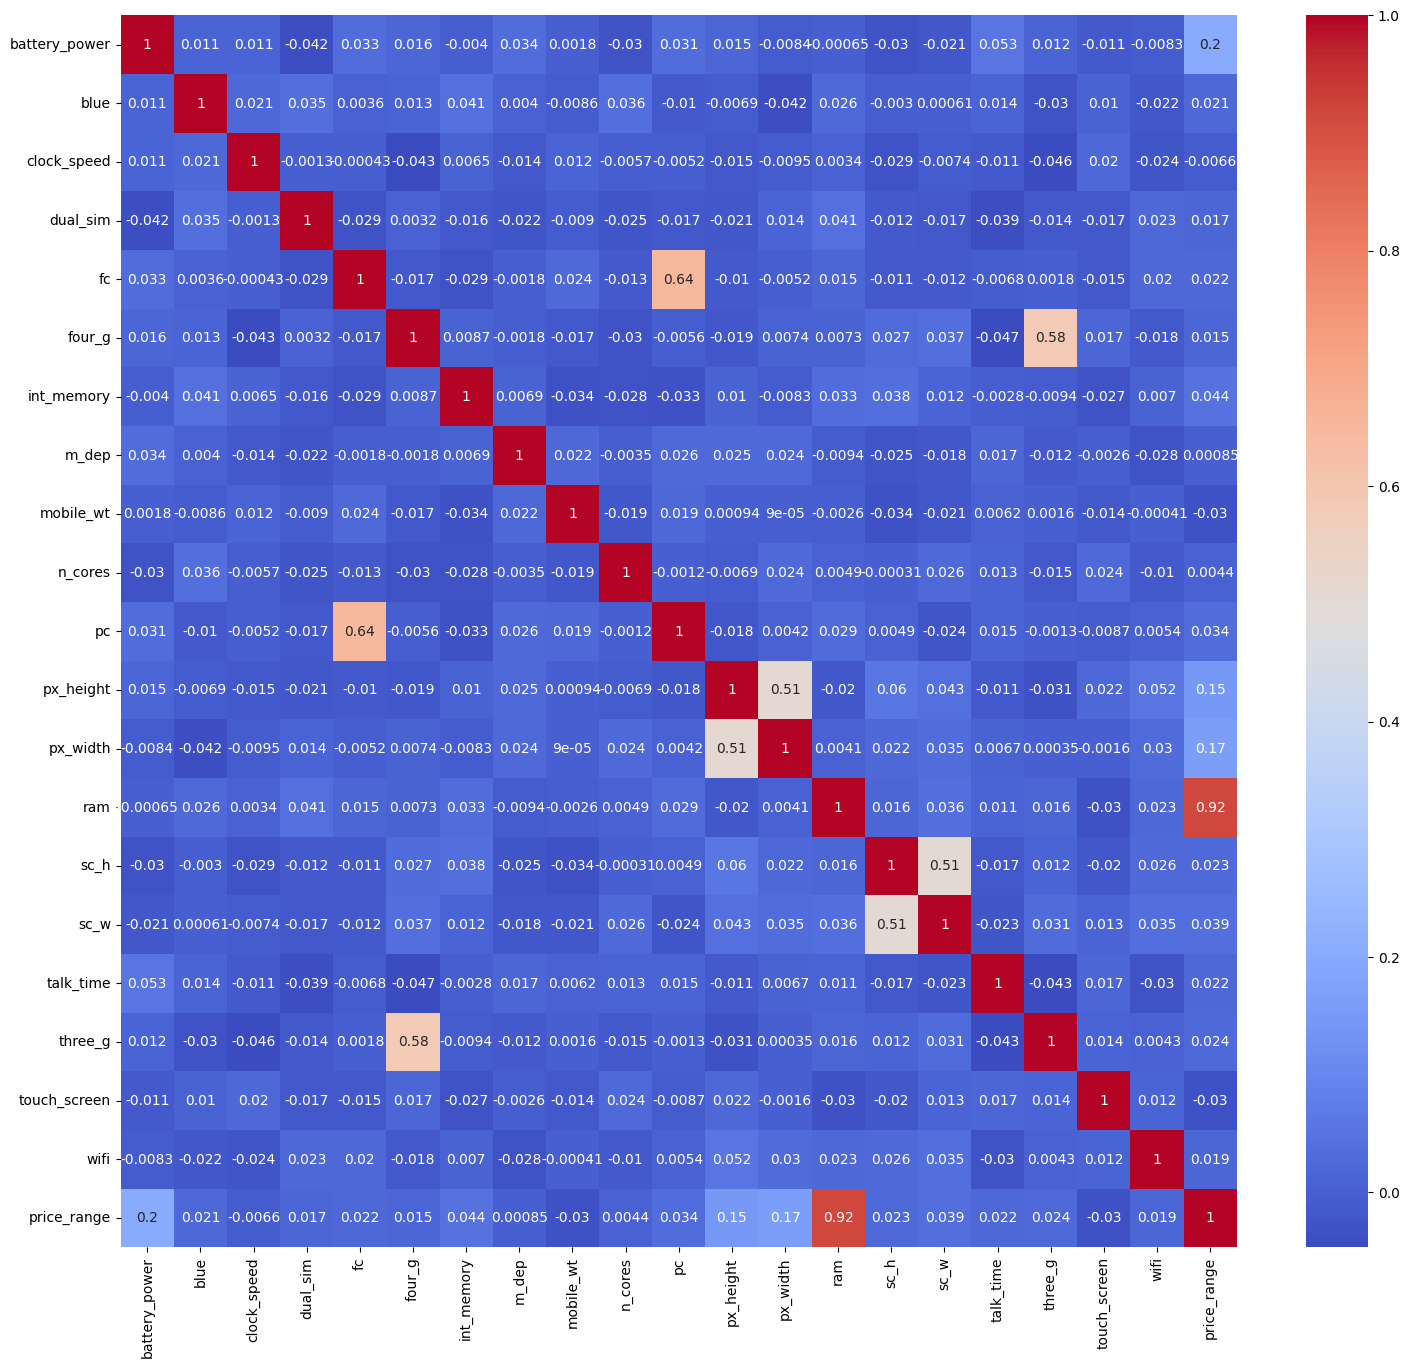

In [18]:
#Correlation Heatmap, this will help you understand relationships between numerical variables.
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

<Axes: title={'center': 'Correlation with price_range'}>

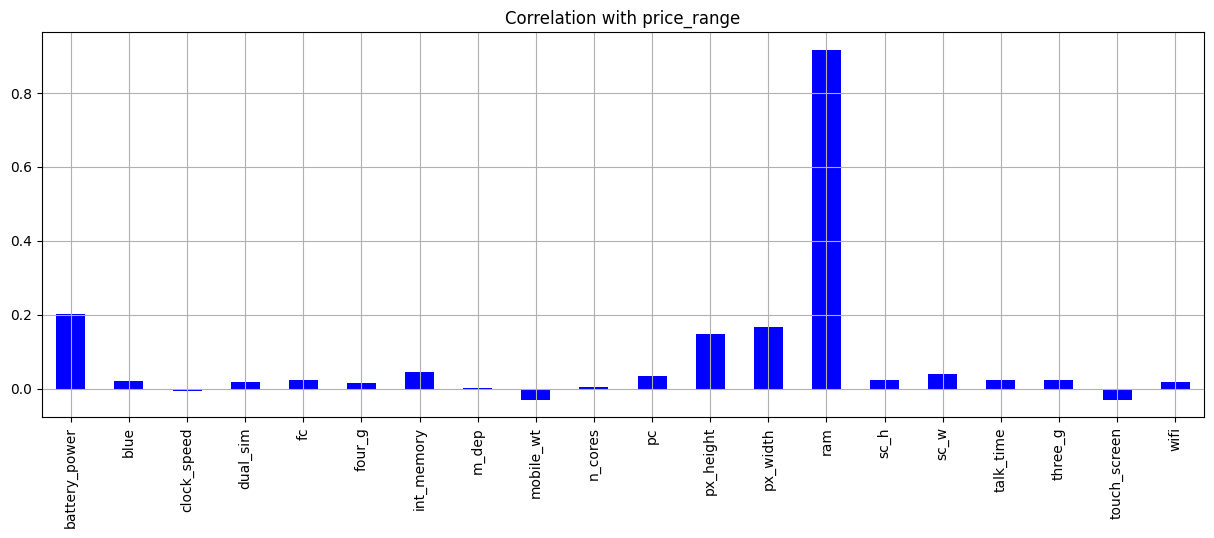

In [19]:
# Feature Importance Visualization
# Understand which features in the dataset are most important in determining the value of "price_range".
df.drop('price_range', axis=1).corrwith(df.price_range).plot(kind='bar', grid=True, figsize=(15, 5)
                                                             ,title="Correlation with price_range", color="Blue")

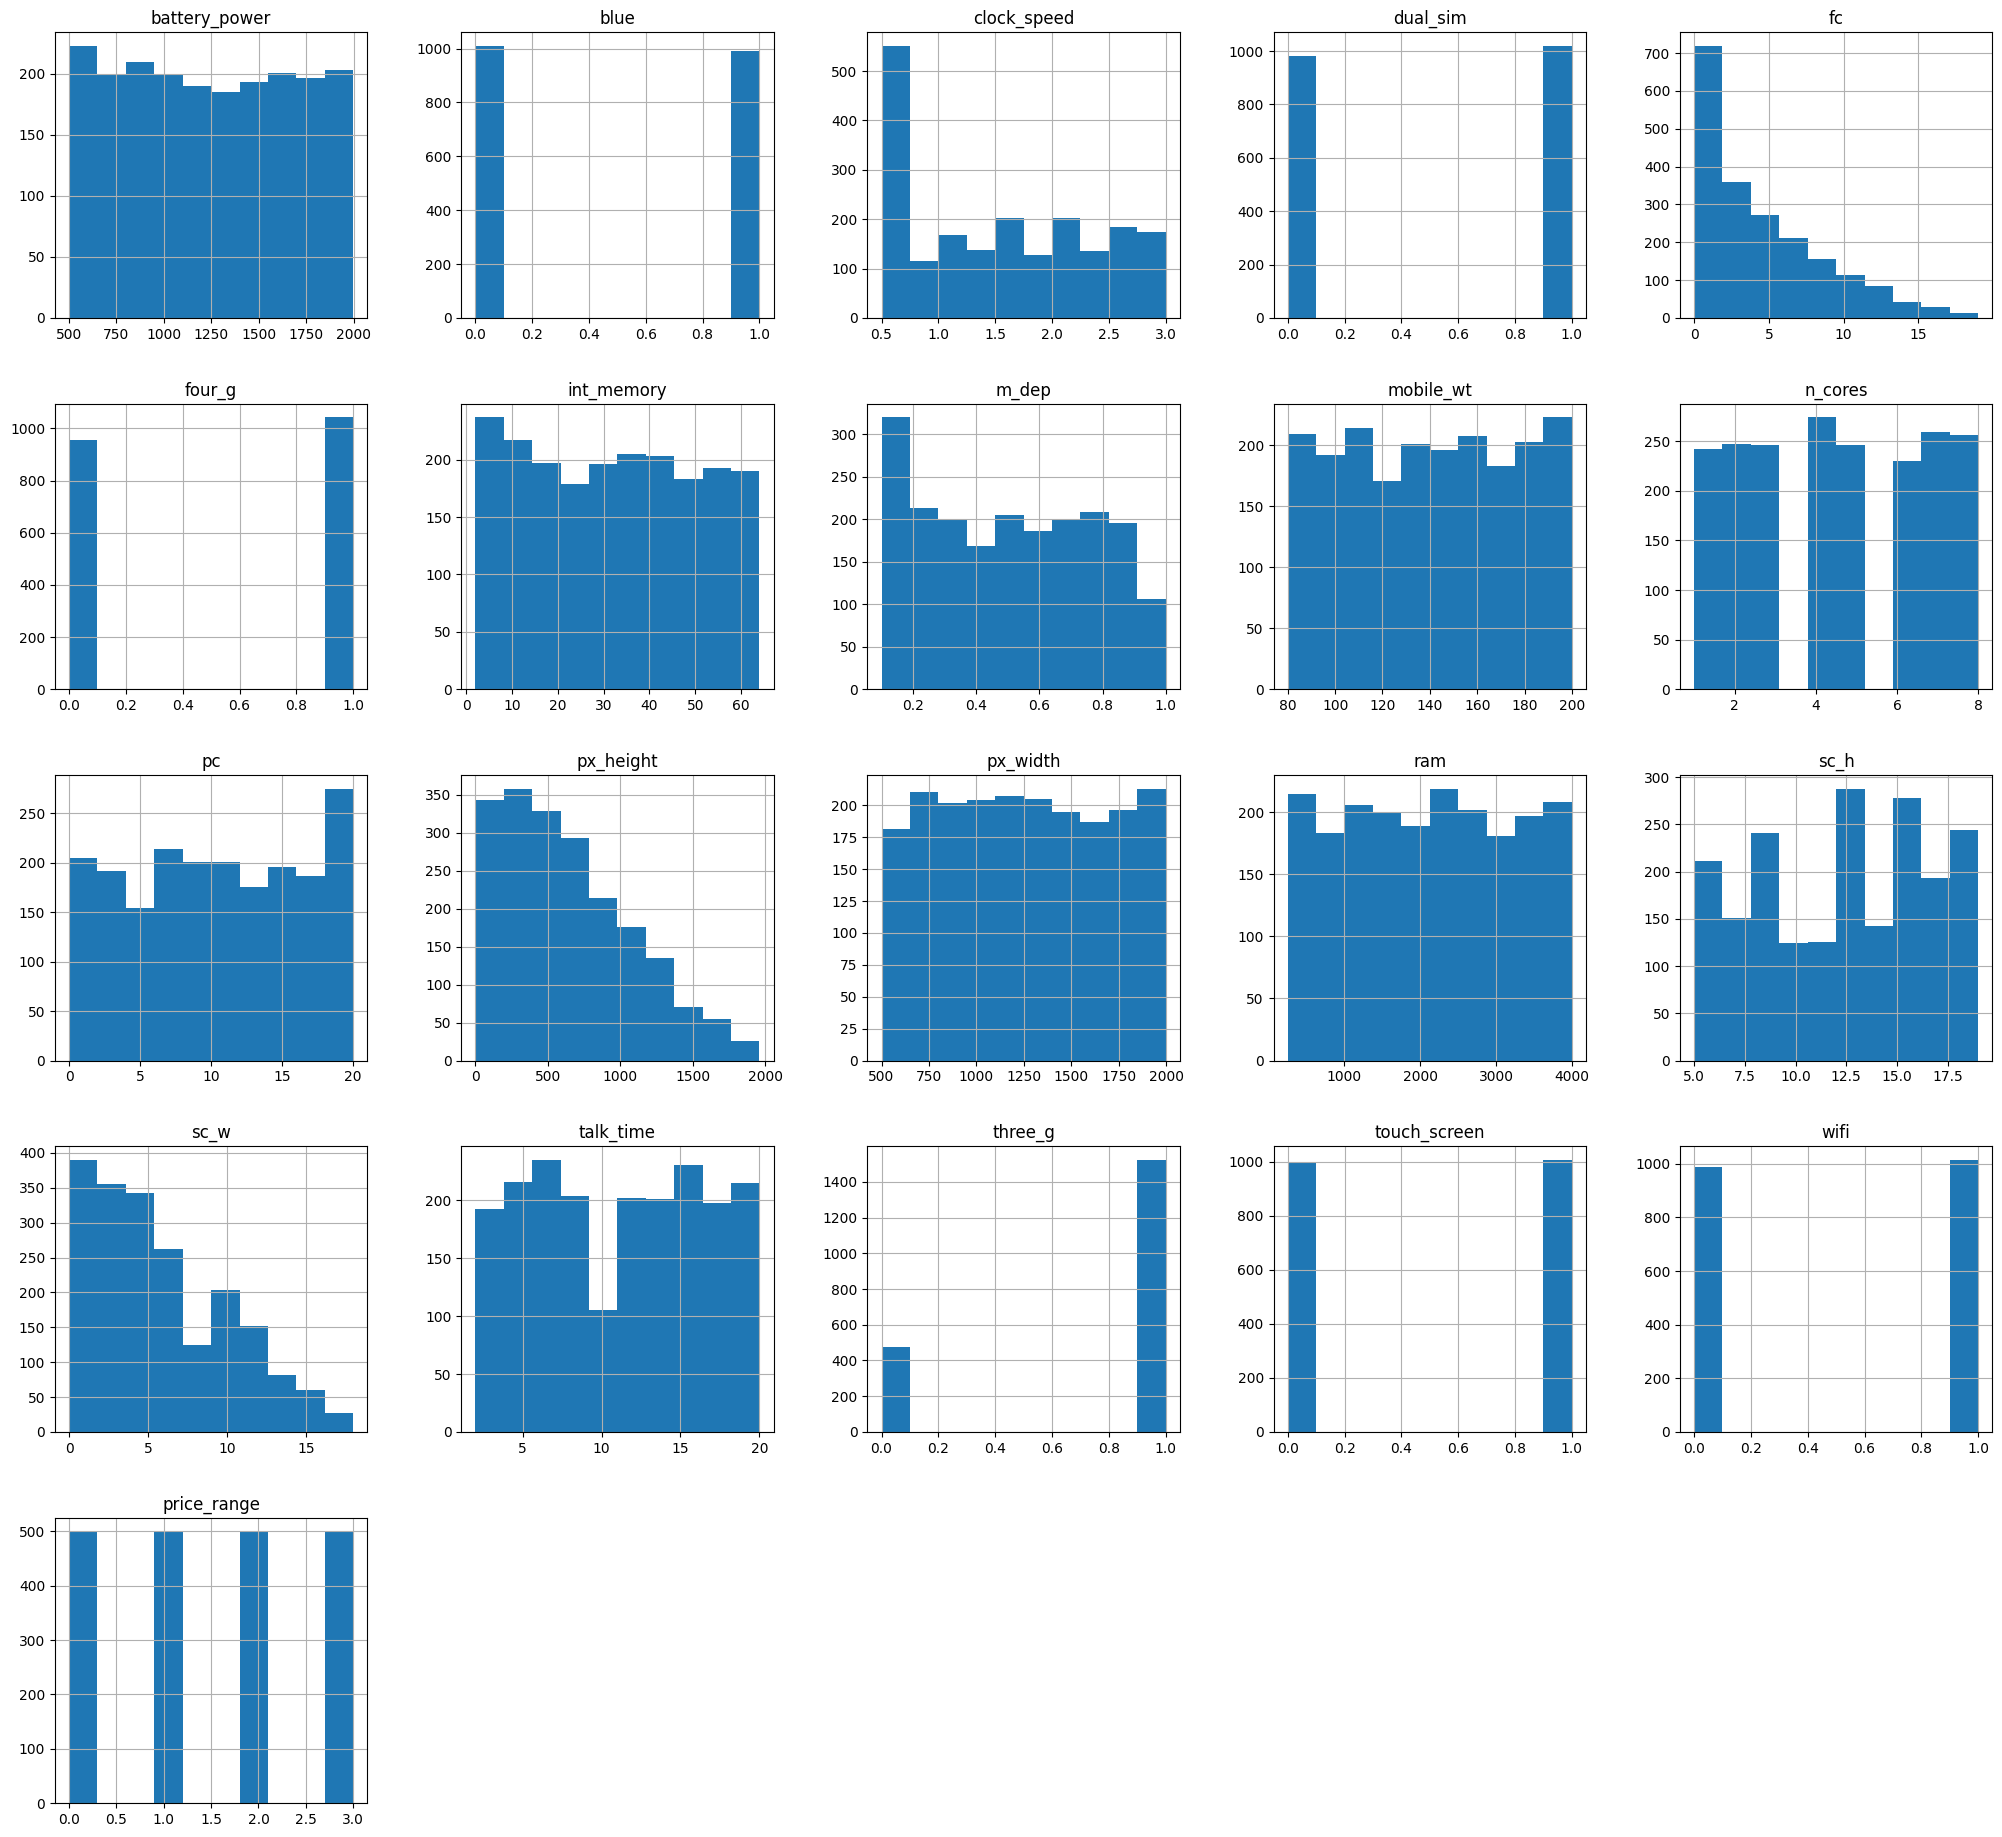

In [24]:
# Distribution of Features, Use histograms to check the distribution of numerical features.
df.hist(figsize=(25, 23))
plt.show()

<Figure size 2500x2300 with 0 Axes>

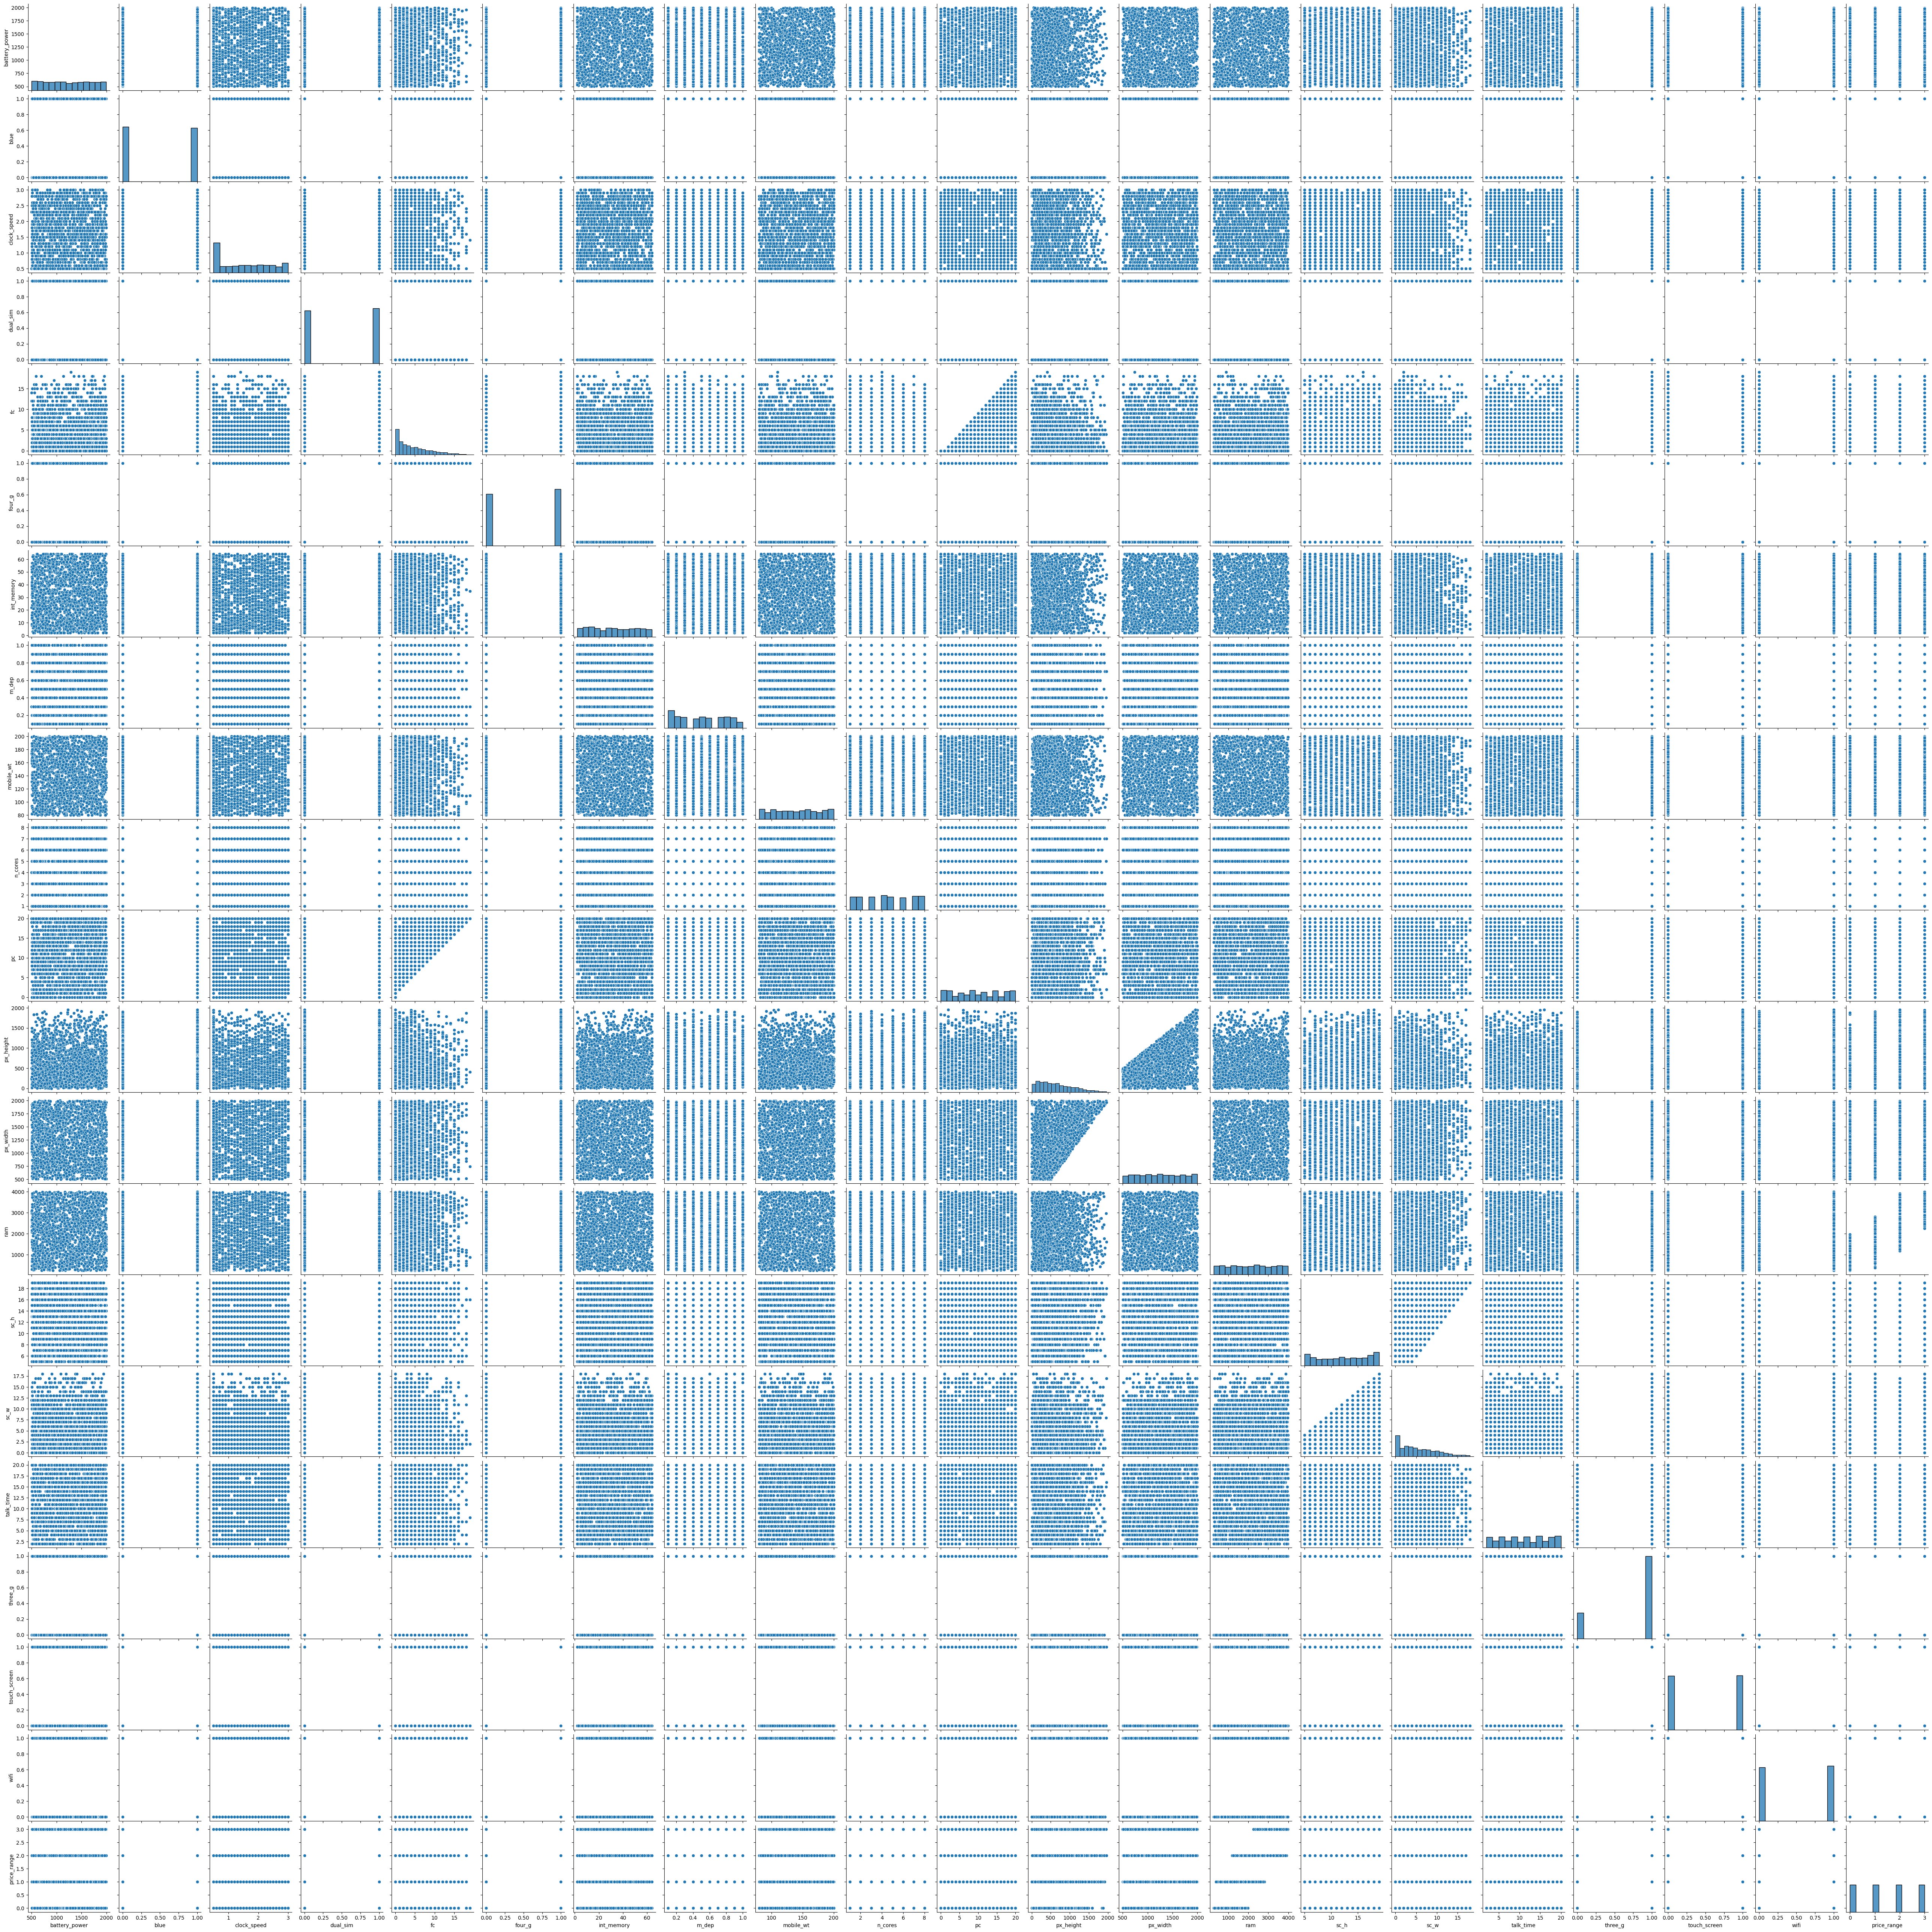

In [25]:
# Pairplot for Feature Relationships, A pairplot can give insights into relationships between features.
plt.figure(figsize=(25, 23))
sns.pairplot(data = df)
plt.show()

In [26]:
def generate_distribution_plot(df_train, continuous_features):
    data = df_train[continuous_features].copy()

    # create subplots
    fig, axes = plt.subplots(nrows=len(data.columns)//2, ncols=2, figsize=(20, 40))
    fig.subplots_adjust(hspace=0.7)

    # set fontdict
    font = {'family': 'serif',
            'color': 'darkred',
            'weight': 'normal',
            'size': 16,
            }
    
    for ax, feature in zip(axes.flatten(), data.columns):
        feature_mean = data[feature].mean()
        feature_median = data[feature].median()
        feature_mode = data[feature].mode().values[0]
        sns.distplot(data[feature], ax=ax)
        ax.set_title(f'Analysis of {feature}', fontdict=font)
        ax.axvline(feature_mean, color='r', linestyle='--', label="Mean")
        ax.axvline(feature_median, color='g', linestyle='-', label="Median")
        ax.axvline(feature_mode, color='b', linestyle='-', label="Mean")
        ax.legend()
        
    plt.show()

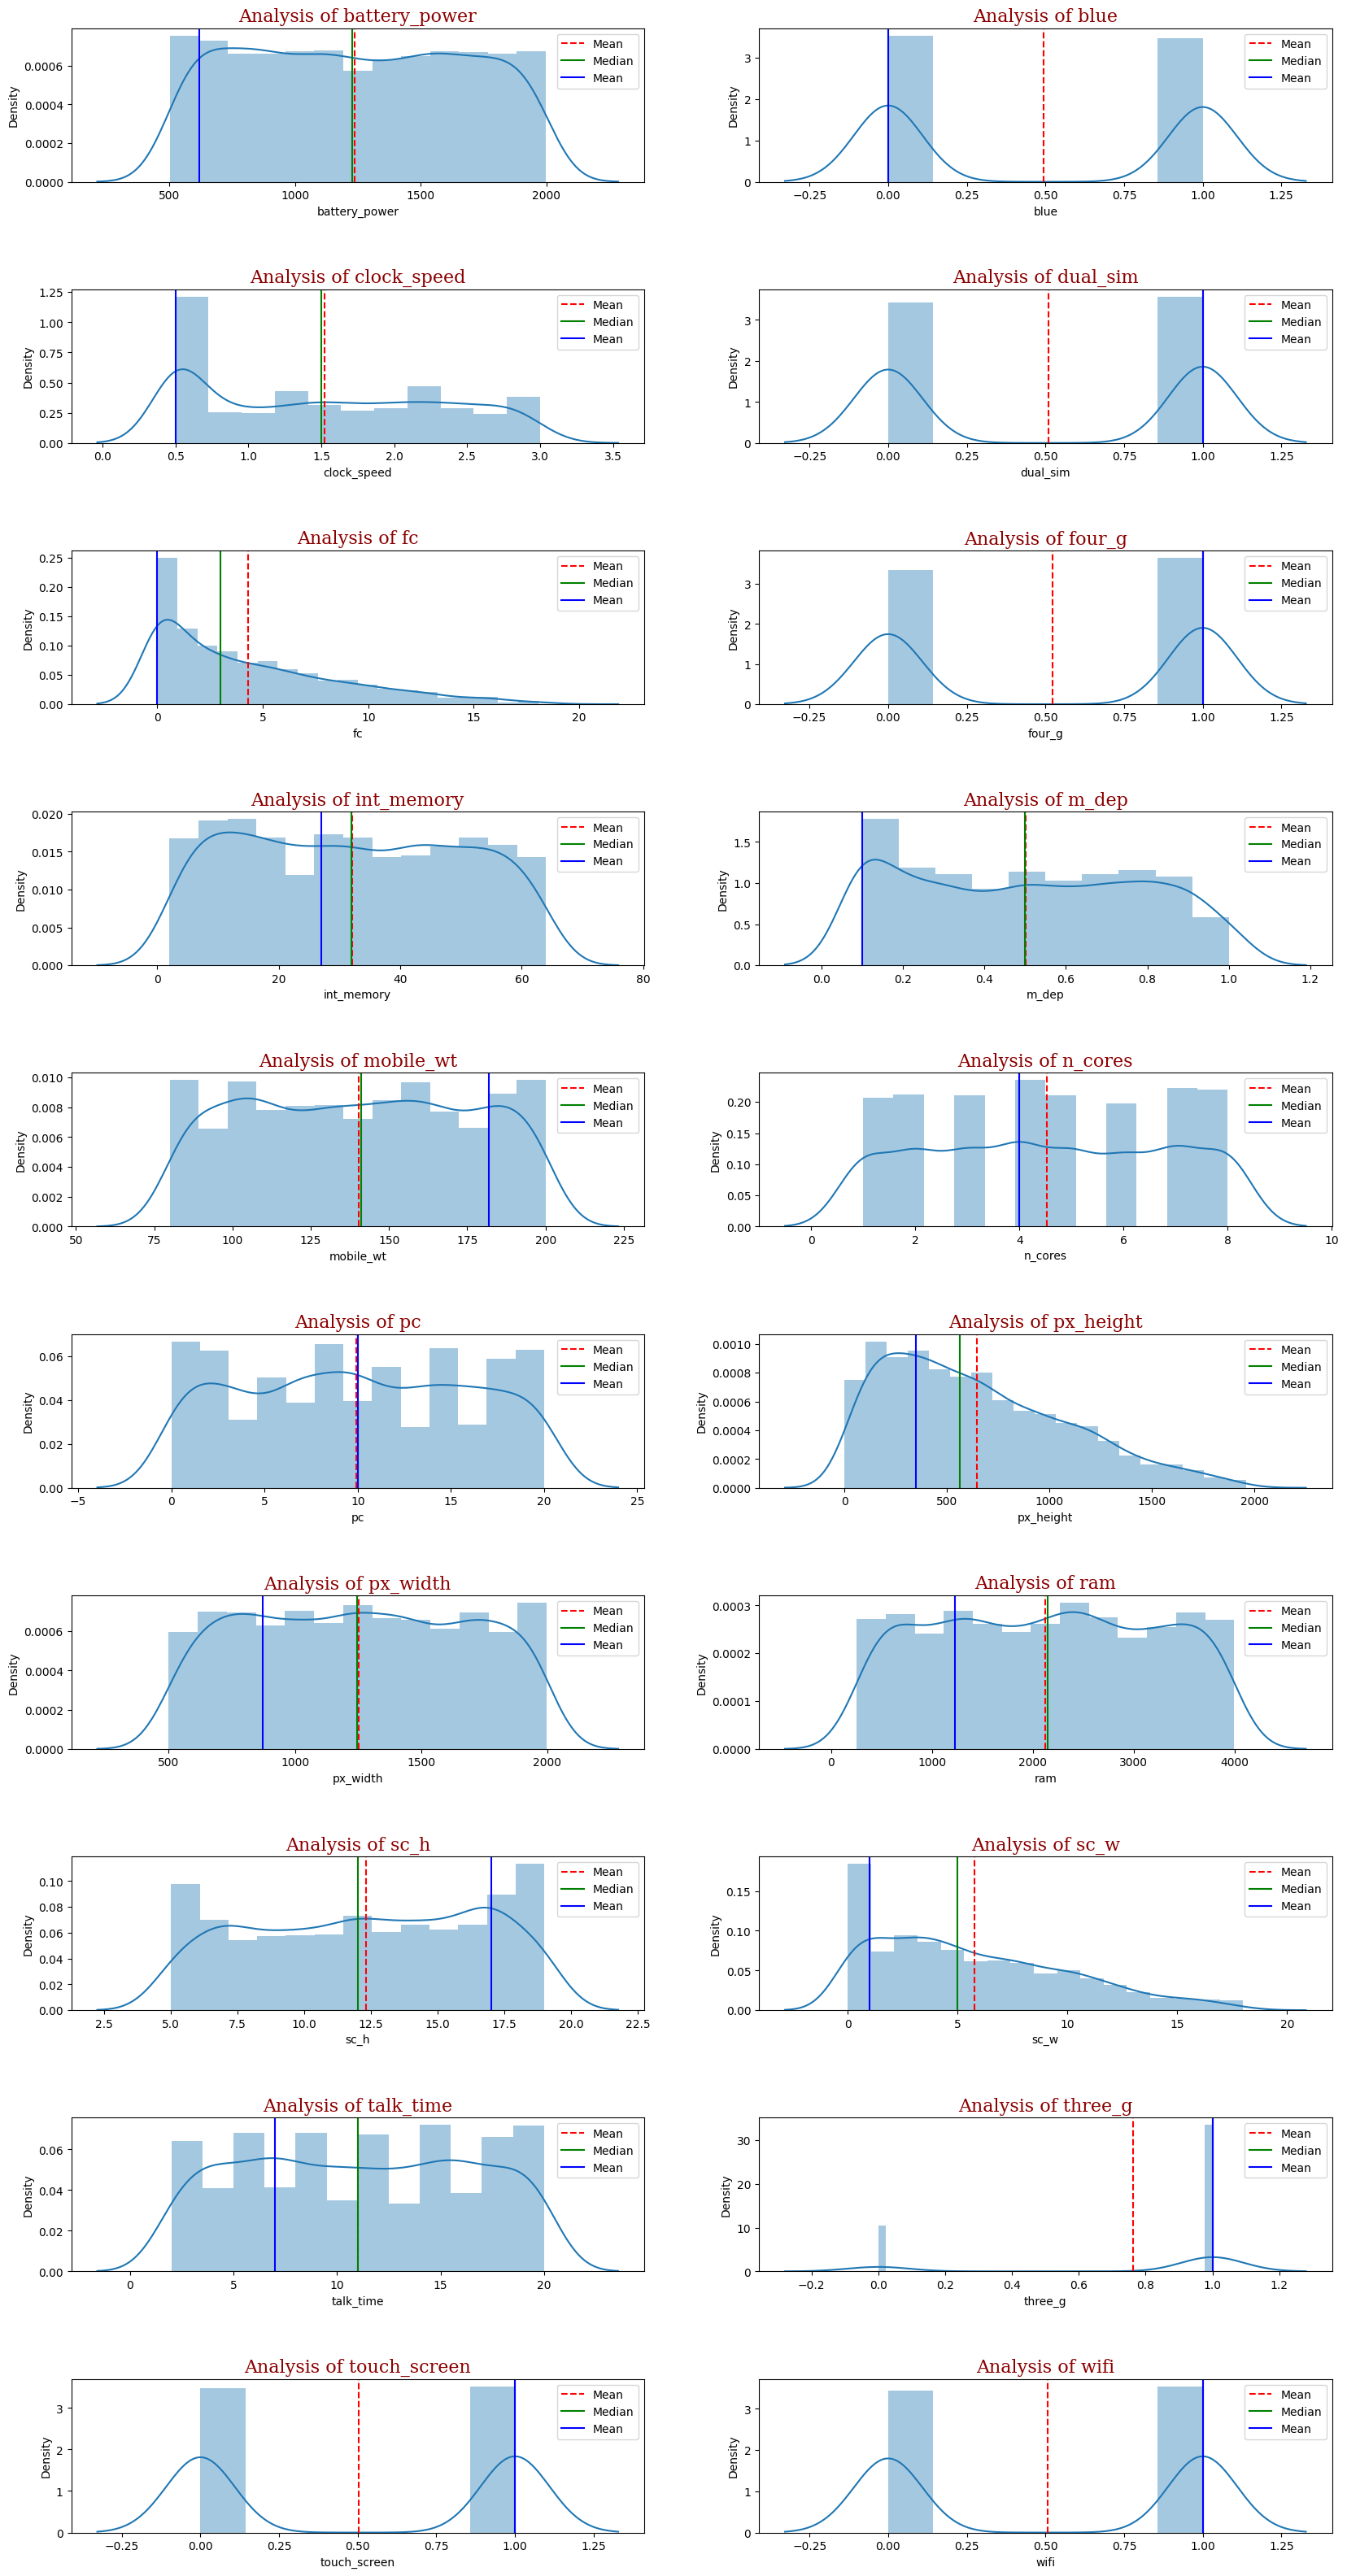

In [27]:
continuous_features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range']

generate_distribution_plot(df, continuous_features)

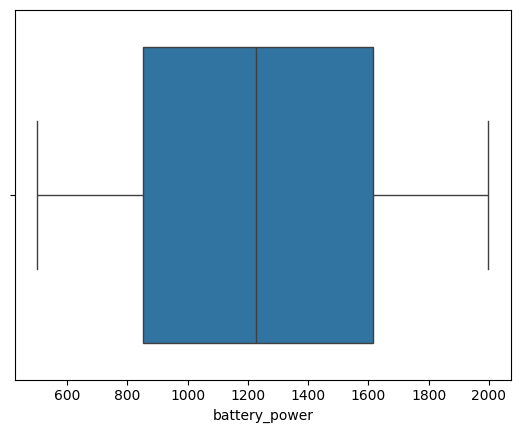

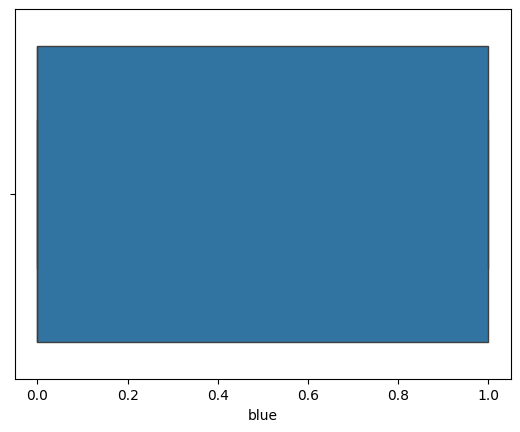

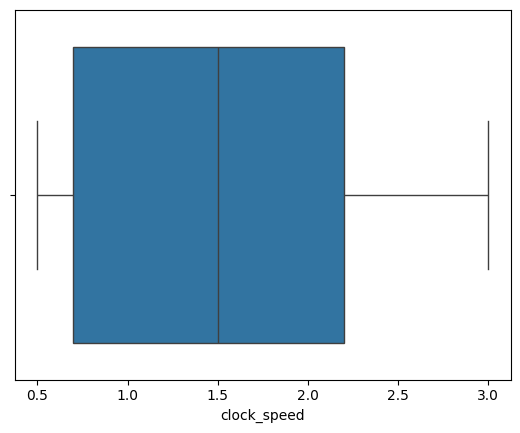

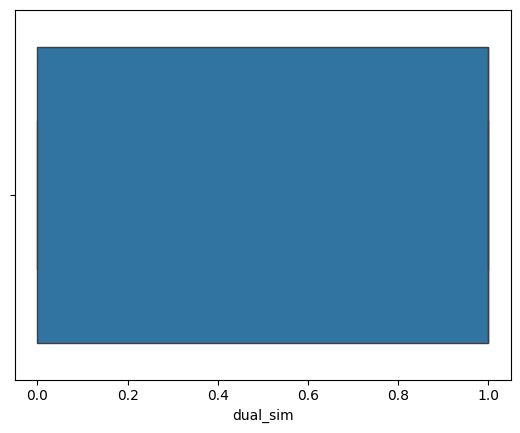

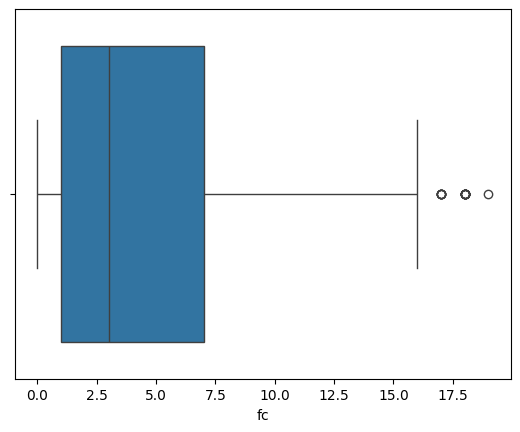

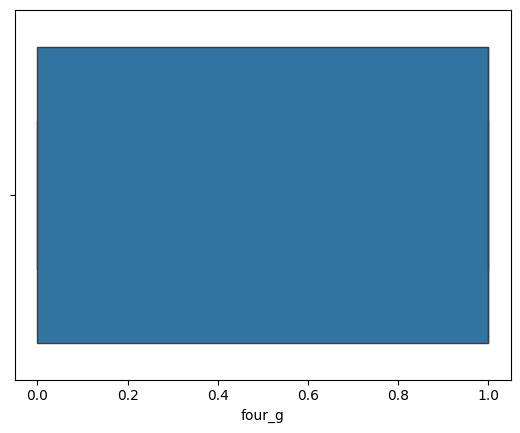

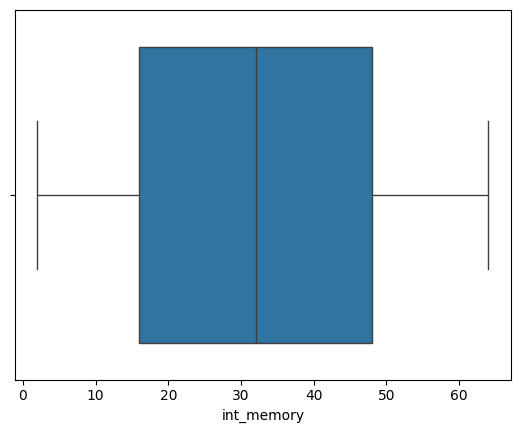

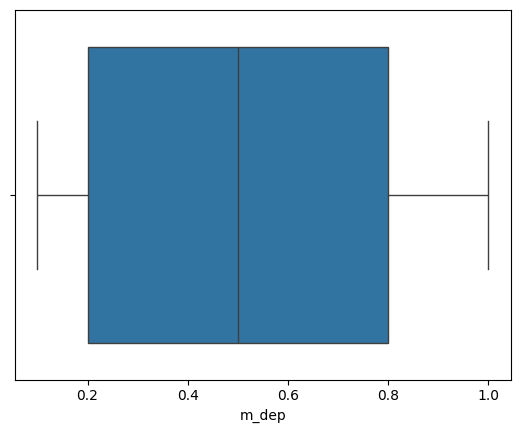

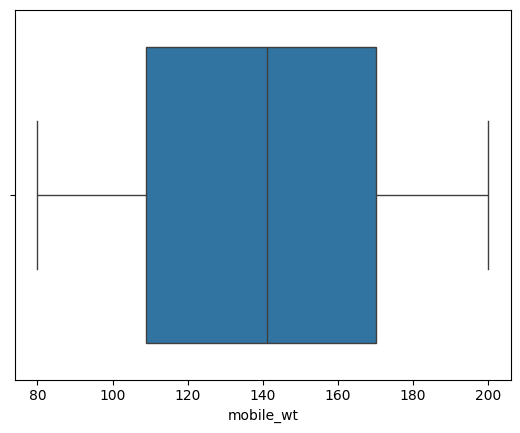

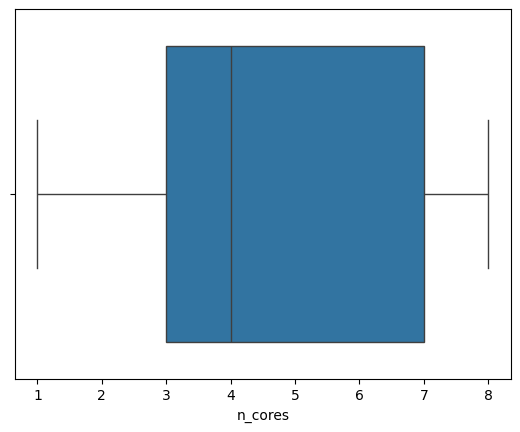

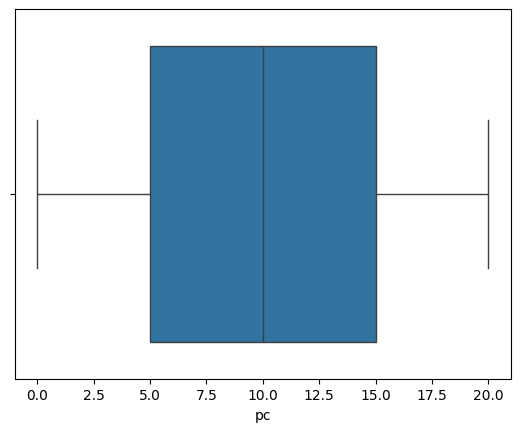

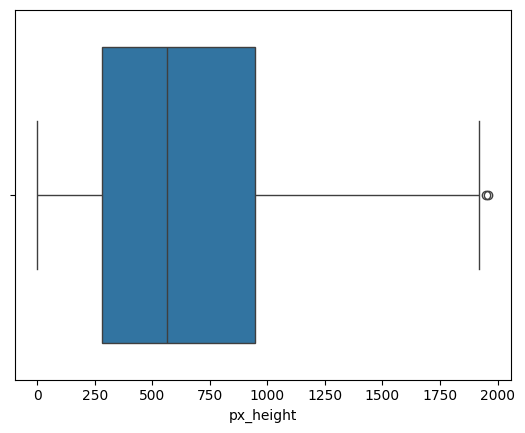

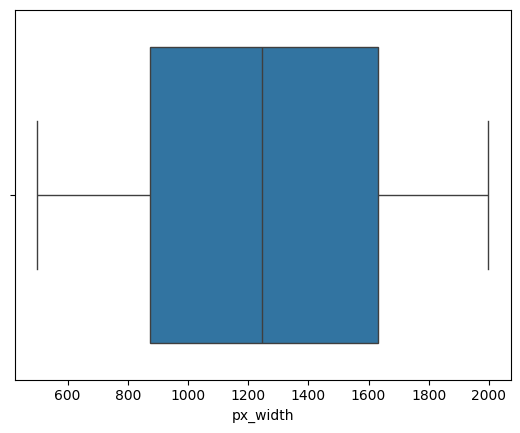

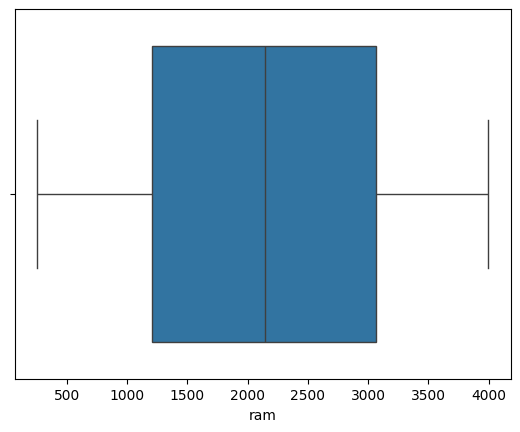

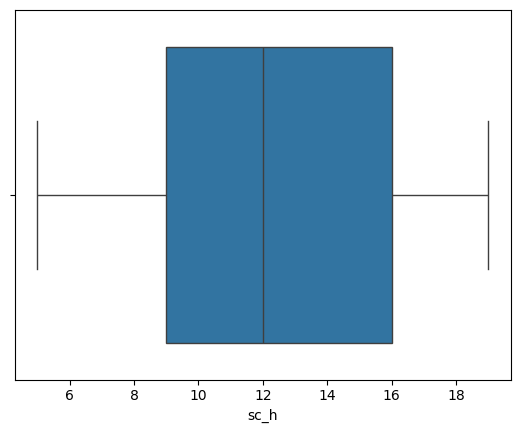

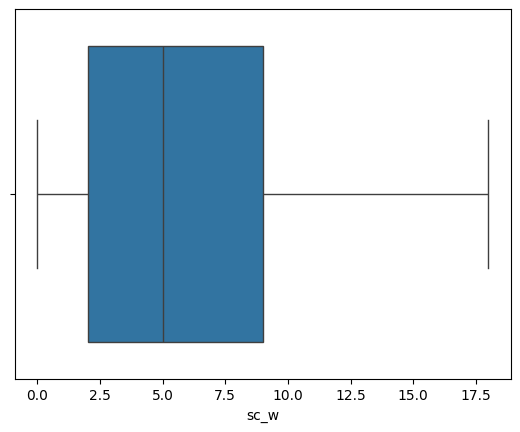

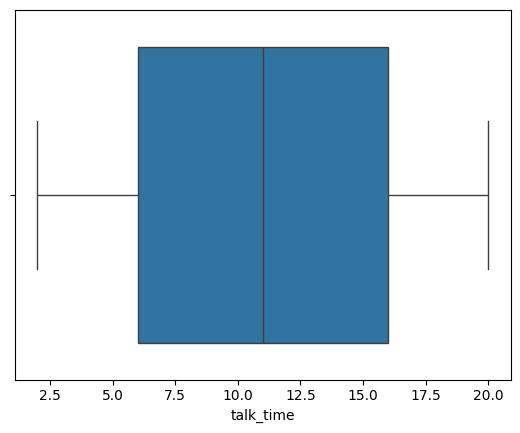

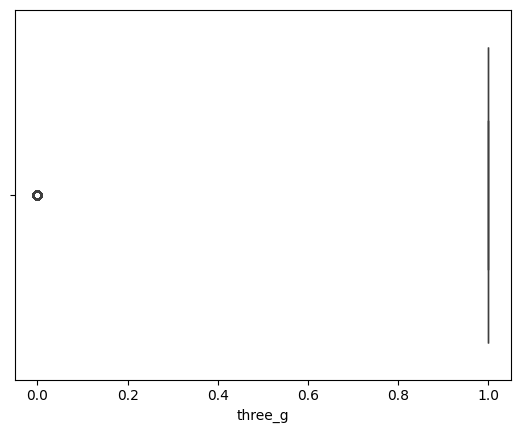

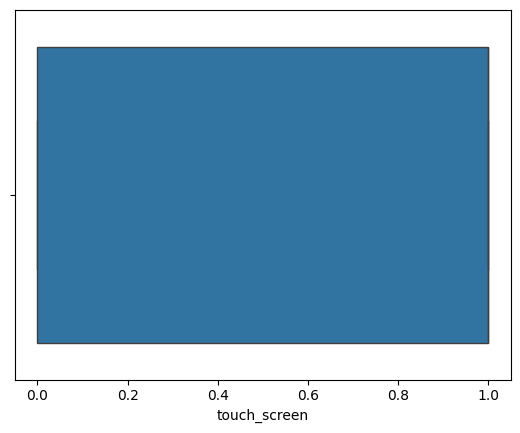

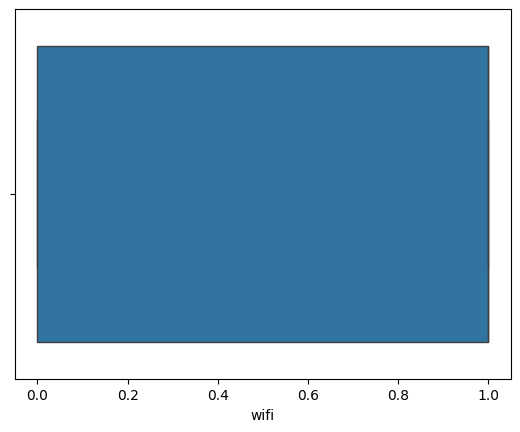

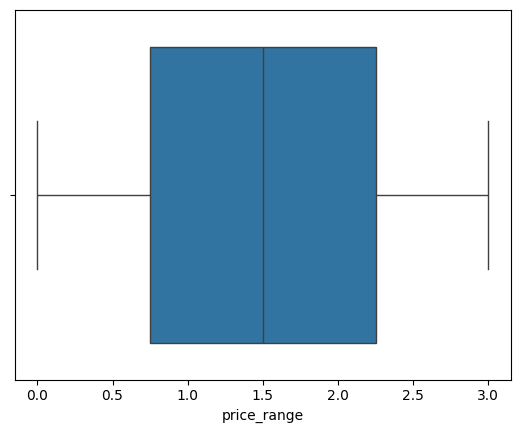

In [28]:
# Show boxplot for all columns
for i in df.columns:
    sns.boxplot(x=i, data = df)
    plt.show()

## 3. Data pre-processing

There is no null value which need to handle or values need to scale .. so we will go to splitting data

In [20]:
X = df.drop('price_range', axis=1)
y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 4. Build the Model

**Random Forest** is an ensemble learning method that improves predictive accuracy by combining multiple decision trees. Each tree is trained on a random subset of data and features, and the final prediction is made by aggregating the results from all trees. This method reduces overfitting, handles large datasets well, and provides insights into feature importance.

***Key Points***:
- **Ensemble Method**: Combines predictions from multiple trees.
- **Decision Trees**: Individual trees are trained on different data subsets.
- **Bagging**: Reduces overfitting by using different samples of data.
- **Feature Randomness**: Uses a subset of features for each tree.

***Benefits***:
- **Enhanced Accuracy**: Reduces errors compared to single decision trees.
- **Versatile**: Suitable for both classification and regression tasks.
- **Feature Importance**: Highlights which features are most influential.

In [23]:
params = {
    'random_state': 42
}

In [24]:
# Train the Random Forest model
rf_model = RandomForestClassifier(**params)
rf_model

RandomForestClassifier(random_state=42)

In [25]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Make predictions
y_pred = rf_model.predict(X_test)

In [27]:
# Model evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8925

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



In [31]:
from sklearn.model_selection import GridSearchCV

In [33]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 8, 16, 32],
    'min_samples_split': [2, 5, 10],
    'criterion': ['entropy', 'gini']
}

rf = RandomForestClassifier(**params)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=500; total time=   2.1s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=500; total time=   2.3s
[CV] END criterion=entropy, max_depth=None, min_samples_split=2, n_estimators=500; total time=   2.0s
[CV] END criterion=e

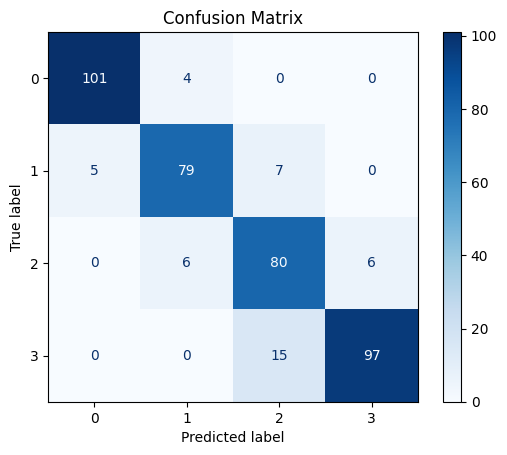

In [34]:
# Visualization of Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                        cmap = plt.cm.Blues,
                                        normalize=None,
                                        display_labels=['0', '1', '2', '3'])
plt.title('Confusion Matrix')
plt.show()

### Learning Curve

In [35]:
from sklearn.model_selection import learning_curve

# Learning curve calculation
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(random_state=42),
                                                        X, y, cv=5,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        scoring='accuracy', random_state=42)

In [36]:
# Calculate the average accuracy and standard deviation for each training step.
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

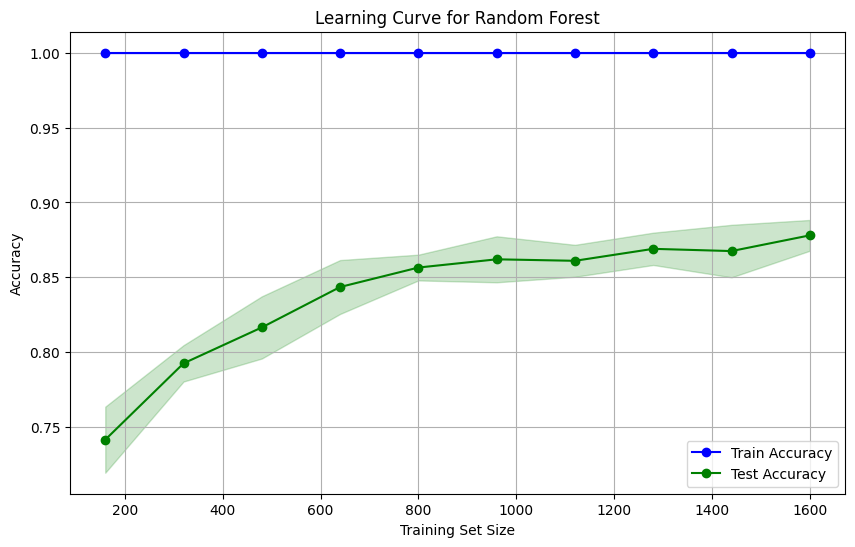

In [37]:
# Learning curve drawing
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Train Accuracy", color="blue", marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2)

plt.plot(train_sizes, test_mean, label="Test Accuracy", color="green", marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="green", alpha=0.2)

plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## 5. Save Model

### A. Joblib

In [42]:
import joblib

# Save model
joblib.dump(rf_model, 'random_forest_model_joblib.pkl')

['random_forest_model_joblib.pkl']

In [43]:
# load the model
loaded_model = joblib.load('random_forest_model_joblib.pkl')

### Pickle 

In [44]:
import pickle

# Save model using pickle
with open('random_forest_model_pickle.pkl', 'wb') as file:
    pickle.dump(rf_model, file)

In [45]:
# Load model using pickle
with open('random_forest_model_pickle.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [46]:
import pickle

# Save model using pickle with a different extension
with open('random_forest_model_pickle.model', 'wb') as file:
    pickle.dump(rf_model, file)

In [47]:
# Load model using pickle from a different extension
with open('random_forest_model_pickle.model', 'rb') as file:
    loaded_model = pickle.load(file)